
AUSTIN WEATHER DATA ANALYSIS AND MODELLING


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#load the dataset
import pandas as pd
df=pd.read_csv('austin_weather.csv')
df.head()  #display the first few rowa

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [ ]:
df.info() #display the datset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [ ]:
print("\nColumns:\n", df.columns) #display the column names


Columns:
 Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')


In [5]:
#data cleaning

#drop irrelevant columns

drop_cols=['Events','Data']
for col in drop_cols:
    if col in df.columns:
        df=df.drop(columns=col)

In [ ]:
#handle special symbols like "T" and "-"
def clean_value(val):
    if val == 'T':
        return 0.0
    elif val == '-':
        return np.nan
    try:
        return float(val)
    except:
        return val

In [10]:
#apply cleaning function to all columns that are objectc type
import numpy as np
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(clean_value)

In [11]:
#convert all columns to numeric where possible
import pandas as pd
df=df.apply(pd.to_numeric,errors='ignore')

C:\Users\Aman\AppData\Local\Temp\ipykernel_15576\978067601.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df=df.apply(pd.to_numeric,errors='ignore')


In [12]:
#check for missing values

print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Date                           0
TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent             2
SeaLevelPressureHighInches     3
SeaLevelPressureAvgInches      3
SeaLevelPressureLowInches      3
VisibilityHighMiles           12
VisibilityAvgMiles            12
VisibilityLowMiles            12
WindHighMPH                    2
WindAvgMPH                     2
WindGustMPH                    4
PrecipitationSumInches         0
dtype: int64


In [15]:
#fill missing values with mean(simple strategy)
df.fillna(df.mean(), inplace=True)

TypeError: Could not convert ['2013-12-212013-12-222013-12-232013-12-242013-12-252013-12-262013-12-272013-12-282013-12-292013-12-302013-12-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312014-02-012014-02-022014-02-032014-02-042014-02-052014-02-062014-02-072014-02-082014-02-092014-02-102014-02-112014-02-122014-02-132014-02-142014-02-152014-02-162014-02-172014-02-182014-02-192014-02-202014-02-212014-02-222014-02-232014-02-242014-02-252014-02-262014-02-272014-02-282014-03-012014-03-022014-03-032014-03-042014-03-052014-03-062014-03-072014-03-082014-03-092014-03-102014-03-112014-03-122014-03-132014-03-142014-03-152014-03-162014-03-172014-03-182014-03-192014-03-202014-03-212014-03-222014-03-232014-03-242014-03-252014-03-262014-03-272014-03-282014-03-292014-03-302014-03-312014-04-012014-04-022014-04-032014-04-042014-04-052014-04-062014-04-072014-04-082014-04-092014-04-102014-04-112014-04-122014-04-132014-04-142014-04-152014-04-162014-04-172014-04-182014-04-192014-04-202014-04-212014-04-222014-04-232014-04-242014-04-252014-04-262014-04-272014-04-282014-04-292014-04-302014-05-012014-05-022014-05-032014-05-042014-05-052014-05-062014-05-072014-05-082014-05-092014-05-102014-05-112014-05-122014-05-132014-05-142014-05-152014-05-162014-05-172014-05-182014-05-192014-05-202014-05-212014-05-222014-05-232014-05-242014-05-252014-05-262014-05-272014-05-282014-05-292014-05-302014-05-312014-06-012014-06-022014-06-032014-06-042014-06-052014-06-062014-06-072014-06-082014-06-092014-06-102014-06-112014-06-122014-06-132014-06-142014-06-152014-06-162014-06-172014-06-182014-06-192014-06-202014-06-212014-06-222014-06-232014-06-242014-06-252014-06-262014-06-272014-06-282014-06-292014-06-302014-07-012014-07-022014-07-032014-07-042014-07-052014-07-062014-07-072014-07-082014-07-092014-07-102014-07-112014-07-122014-07-132014-07-142014-07-152014-07-162014-07-172014-07-182014-07-192014-07-202014-07-212014-07-222014-07-232014-07-242014-07-252014-07-262014-07-272014-07-282014-07-292014-07-302014-07-312014-08-012014-08-022014-08-032014-08-042014-08-052014-08-062014-08-072014-08-082014-08-092014-08-102014-08-112014-08-122014-08-132014-08-142014-08-152014-08-162014-08-172014-08-182014-08-192014-08-202014-08-212014-08-222014-08-232014-08-242014-08-252014-08-262014-08-272014-08-282014-08-292014-08-302014-08-312014-09-012014-09-022014-09-032014-09-042014-09-052014-09-062014-09-072014-09-082014-09-092014-09-102014-09-112014-09-122014-09-132014-09-142014-09-152014-09-162014-09-172014-09-182014-09-192014-09-202014-09-212014-09-222014-09-232014-09-242014-09-252014-09-262014-09-272014-09-282014-09-292014-09-302014-10-012014-10-022014-10-032014-10-042014-10-052014-10-062014-10-072014-10-082014-10-092014-10-102014-10-112014-10-122014-10-132014-10-142014-10-152014-10-162014-10-172014-10-182014-10-192014-10-202014-10-212014-10-222014-10-232014-10-242014-10-252014-10-262014-10-272014-10-282014-10-292014-10-302014-10-312014-11-012014-11-022014-11-032014-11-042014-11-052014-11-062014-11-072014-11-082014-11-092014-11-102014-11-112014-11-122014-11-132014-11-142014-11-152014-11-162014-11-172014-11-182014-11-192014-11-202014-11-212014-11-222014-11-232014-11-242014-11-252014-11-262014-11-272014-11-282014-11-292014-11-302014-12-012014-12-022014-12-032014-12-042014-12-052014-12-062014-12-072014-12-082014-12-092014-12-102014-12-112014-12-122014-12-132014-12-142014-12-152014-12-162014-12-172014-12-182014-12-192014-12-202014-12-212014-12-222014-12-232014-12-242014-12-252014-12-262014-12-272014-12-282014-12-292014-12-302014-12-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312015-02-012015-02-022015-02-032015-02-042015-02-052015-02-062015-02-072015-02-082015-02-092015-02-102015-02-112015-02-122015-02-132015-02-142015-02-152015-02-162015-02-172015-02-182015-02-192015-02-202015-02-212015-02-222015-02-232015-02-242015-02-252015-02-262015-02-272015-02-282015-03-012015-03-022015-03-032015-03-042015-03-052015-03-062015-03-072015-03-082015-03-092015-03-102015-03-112015-03-122015-03-132015-03-142015-03-152015-03-162015-03-172015-03-182015-03-192015-03-202015-03-212015-03-222015-03-232015-03-242015-03-252015-03-262015-03-272015-03-282015-03-292015-03-302015-03-312015-04-012015-04-022015-04-032015-04-042015-04-052015-04-062015-04-072015-04-082015-04-092015-04-102015-04-112015-04-122015-04-132015-04-142015-04-152015-04-162015-04-172015-04-182015-04-192015-04-202015-04-212015-04-222015-04-232015-04-242015-04-252015-04-262015-04-272015-04-282015-04-292015-04-302015-05-012015-05-022015-05-032015-05-042015-05-052015-05-062015-05-072015-05-082015-05-092015-05-102015-05-112015-05-122015-05-132015-05-142015-05-152015-05-162015-05-172015-05-182015-05-192015-05-202015-05-212015-05-222015-05-232015-05-242015-05-252015-05-262015-05-272015-05-282015-05-292015-05-302015-05-312015-06-012015-06-022015-06-032015-06-042015-06-052015-06-062015-06-072015-06-082015-06-092015-06-102015-06-112015-06-122015-06-132015-06-142015-06-152015-06-162015-06-172015-06-182015-06-192015-06-202015-06-212015-06-222015-06-232015-06-242015-06-252015-06-262015-06-272015-06-282015-06-292015-06-302015-07-012015-07-022015-07-032015-07-042015-07-052015-07-062015-07-072015-07-082015-07-092015-07-102015-07-112015-07-122015-07-132015-07-142015-07-152015-07-162015-07-172015-07-182015-07-192015-07-202015-07-212015-07-222015-07-232015-07-242015-07-252015-07-262015-07-272015-07-282015-07-292015-07-302015-07-312015-08-012015-08-022015-08-032015-08-042015-08-052015-08-062015-08-072015-08-082015-08-092015-08-102015-08-112015-08-122015-08-132015-08-142015-08-152015-08-162015-08-172015-08-182015-08-192015-08-202015-08-212015-08-222015-08-232015-08-242015-08-252015-08-262015-08-272015-08-282015-08-292015-08-302015-08-312015-09-012015-09-022015-09-032015-09-042015-09-052015-09-062015-09-072015-09-082015-09-092015-09-102015-09-112015-09-122015-09-132015-09-142015-09-152015-09-162015-09-172015-09-182015-09-192015-09-202015-09-212015-09-222015-09-232015-09-242015-09-252015-09-262015-09-272015-09-282015-09-292015-09-302015-10-012015-10-022015-10-032015-10-042015-10-052015-10-062015-10-072015-10-082015-10-092015-10-102015-10-112015-10-122015-10-132015-10-142015-10-152015-10-162015-10-172015-10-182015-10-192015-10-202015-10-212015-10-222015-10-232015-10-242015-10-252015-10-262015-10-272015-10-282015-10-292015-10-302015-10-312015-11-012015-11-022015-11-032015-11-042015-11-052015-11-062015-11-072015-11-082015-11-092015-11-102015-11-112015-11-122015-11-132015-11-142015-11-152015-11-162015-11-172015-11-182015-11-192015-11-202015-11-212015-11-222015-11-232015-11-242015-11-252015-11-262015-11-272015-11-282015-11-292015-11-302015-12-012015-12-022015-12-032015-12-042015-12-052015-12-062015-12-072015-12-082015-12-092015-12-102015-12-112015-12-122015-12-132015-12-142015-12-152015-12-162015-12-172015-12-182015-12-192015-12-202015-12-212015-12-222015-12-232015-12-242015-12-252015-12-262015-12-272015-12-282015-12-292015-12-302015-12-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-072016-01-082016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312016-02-012016-02-022016-02-032016-02-042016-02-052016-02-062016-02-072016-02-082016-02-092016-02-102016-02-112016-02-122016-02-132016-02-142016-02-152016-02-162016-02-172016-02-182016-02-192016-02-202016-02-212016-02-222016-02-232016-02-242016-02-252016-02-262016-02-272016-02-282016-02-292016-03-012016-03-022016-03-032016-03-042016-03-052016-03-062016-03-072016-03-082016-03-092016-03-102016-03-112016-03-122016-03-132016-03-142016-03-152016-03-162016-03-172016-03-182016-03-192016-03-202016-03-212016-03-222016-03-232016-03-242016-03-252016-03-262016-03-272016-03-282016-03-292016-03-302016-03-312016-04-012016-04-022016-04-032016-04-042016-04-052016-04-062016-04-072016-04-082016-04-092016-04-102016-04-112016-04-122016-04-132016-04-142016-04-152016-04-162016-04-172016-04-182016-04-192016-04-202016-04-212016-04-222016-04-232016-04-242016-04-252016-04-262016-04-272016-04-282016-04-292016-04-302016-05-012016-05-022016-05-032016-05-042016-05-052016-05-062016-05-072016-05-082016-05-092016-05-102016-05-112016-05-122016-05-132016-05-142016-05-152016-05-162016-05-172016-05-182016-05-192016-05-202016-05-212016-05-222016-05-232016-05-242016-05-252016-05-262016-05-272016-05-282016-05-292016-05-302016-05-312016-06-012016-06-022016-06-032016-06-042016-06-052016-06-062016-06-072016-06-082016-06-092016-06-102016-06-112016-06-122016-06-132016-06-142016-06-152016-06-162016-06-172016-06-182016-06-192016-06-202016-06-212016-06-222016-06-232016-06-242016-06-252016-06-262016-06-272016-06-282016-06-292016-06-302016-07-012016-07-022016-07-032016-07-042016-07-052016-07-062016-07-072016-07-082016-07-092016-07-102016-07-112016-07-122016-07-132016-07-142016-07-152016-07-162016-07-172016-07-182016-07-192016-07-202016-07-212016-07-222016-07-232016-07-242016-07-252016-07-262016-07-272016-07-282016-07-292016-07-302016-07-312016-08-012016-08-022016-08-032016-08-042016-08-052016-08-062016-08-072016-08-082016-08-092016-08-102016-08-112016-08-122016-08-132016-08-142016-08-152016-08-162016-08-172016-08-182016-08-192016-08-202016-08-212016-08-222016-08-232016-08-242016-08-252016-08-262016-08-272016-08-282016-08-292016-08-302016-08-312016-09-012016-09-022016-09-032016-09-042016-09-052016-09-062016-09-072016-09-082016-09-092016-09-102016-09-112016-09-122016-09-132016-09-142016-09-152016-09-162016-09-172016-09-182016-09-192016-09-202016-09-212016-09-222016-09-232016-09-242016-09-252016-09-262016-09-272016-09-282016-09-292016-09-302016-10-012016-10-022016-10-032016-10-042016-10-052016-10-062016-10-072016-10-082016-10-092016-10-102016-10-112016-10-122016-10-132016-10-142016-10-152016-10-162016-10-172016-10-182016-10-192016-10-202016-10-212016-10-222016-10-232016-10-242016-10-252016-10-262016-10-272016-10-282016-10-292016-10-302016-10-312016-11-012016-11-022016-11-032016-11-042016-11-052016-11-062016-11-072016-11-082016-11-092016-11-102016-11-112016-11-122016-11-132016-11-142016-11-152016-11-162016-11-172016-11-182016-11-192016-11-202016-11-212016-11-222016-11-232016-11-242016-11-252016-11-262016-11-272016-11-282016-11-292016-11-302016-12-012016-12-022016-12-032016-12-042016-12-052016-12-062016-12-072016-12-082016-12-092016-12-102016-12-112016-12-122016-12-132016-12-142016-12-152016-12-162016-12-172016-12-182016-12-192016-12-202016-12-212016-12-222016-12-232016-12-242016-12-252016-12-262016-12-272016-12-282016-12-292016-12-302016-12-312017-01-012017-01-022017-01-032017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-122017-01-132017-01-142017-01-152017-01-162017-01-172017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-242017-01-252017-01-262017-01-272017-01-282017-01-292017-01-302017-01-312017-02-012017-02-022017-02-032017-02-042017-02-052017-02-062017-02-072017-02-082017-02-092017-02-102017-02-112017-02-122017-02-132017-02-142017-02-152017-02-162017-02-172017-02-182017-02-192017-02-202017-02-212017-02-222017-02-232017-02-242017-02-252017-02-262017-02-272017-02-282017-03-012017-03-022017-03-032017-03-042017-03-052017-03-062017-03-072017-03-082017-03-092017-03-102017-03-112017-03-122017-03-132017-03-142017-03-152017-03-162017-03-172017-03-182017-03-192017-03-202017-03-212017-03-222017-03-232017-03-242017-03-252017-03-262017-03-272017-03-282017-03-292017-03-302017-03-312017-04-012017-04-022017-04-032017-04-042017-04-052017-04-062017-04-072017-04-082017-04-092017-04-102017-04-112017-04-122017-04-132017-04-142017-04-152017-04-162017-04-172017-04-182017-04-192017-04-202017-04-212017-04-222017-04-232017-04-242017-04-252017-04-262017-04-272017-04-282017-04-292017-04-302017-05-012017-05-022017-05-032017-05-042017-05-052017-05-062017-05-072017-05-082017-05-092017-05-102017-05-112017-05-122017-05-132017-05-142017-05-152017-05-162017-05-172017-05-182017-05-192017-05-202017-05-212017-05-222017-05-232017-05-242017-05-252017-05-262017-05-272017-05-282017-05-292017-05-302017-05-312017-06-012017-06-022017-06-032017-06-042017-06-052017-06-062017-06-072017-06-082017-06-092017-06-102017-06-112017-06-122017-06-132017-06-142017-06-152017-06-162017-06-172017-06-182017-06-192017-06-202017-06-212017-06-222017-06-232017-06-242017-06-252017-06-262017-06-272017-06-282017-06-292017-06-302017-07-012017-07-022017-07-032017-07-042017-07-052017-07-062017-07-072017-07-082017-07-092017-07-102017-07-112017-07-122017-07-132017-07-142017-07-152017-07-162017-07-172017-07-182017-07-192017-07-202017-07-212017-07-222017-07-232017-07-242017-07-252017-07-262017-07-272017-07-282017-07-292017-07-302017-07-31'] to numeric

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1312 non-null   float64
 5   DewPointAvgF                1312 non-null   float64
 6   DewPointLowF                1312 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1317 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1316 non-null   float64
 11  SeaLevelPressureAvgInches   1316 non-null   float64
 12  SeaLevelPressureLowInches   1316 non-null   float64
 13  VisibilityHighMiles         1307 

In [17]:
# Select features and target variable
features = ['TempAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'WindAvgMPH']
target = 'PrecipitationSumInches'


In [18]:
# Ensure these columns exist
for col in features + [target]:
    if col not in df.columns:
        print(f"Column '{col}' not found in data.")

In [19]:
# Drop rows with any remaining missing values (just in case)
data = df[features + [target]].dropna()

X = data[features]
y = data[target]

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#split data into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)


LINEAR REGRESSION MODEL

In [23]:
#initialisation of model

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
#predict on test set
y_pred = model.predict(X_test)

In [25]:
#evaluate the model
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [26]:
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error: 0.1308
R2 Score: 0.0888


In [27]:
# Display model coefficients
coefficients = pd.Series(model.coef_, index=features)
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
TempAvgF                    -0.004057
HumidityAvgPercent           0.011439
SeaLevelPressureAvgInches   -0.318585
WindAvgMPH                   0.010678
dtype: float64


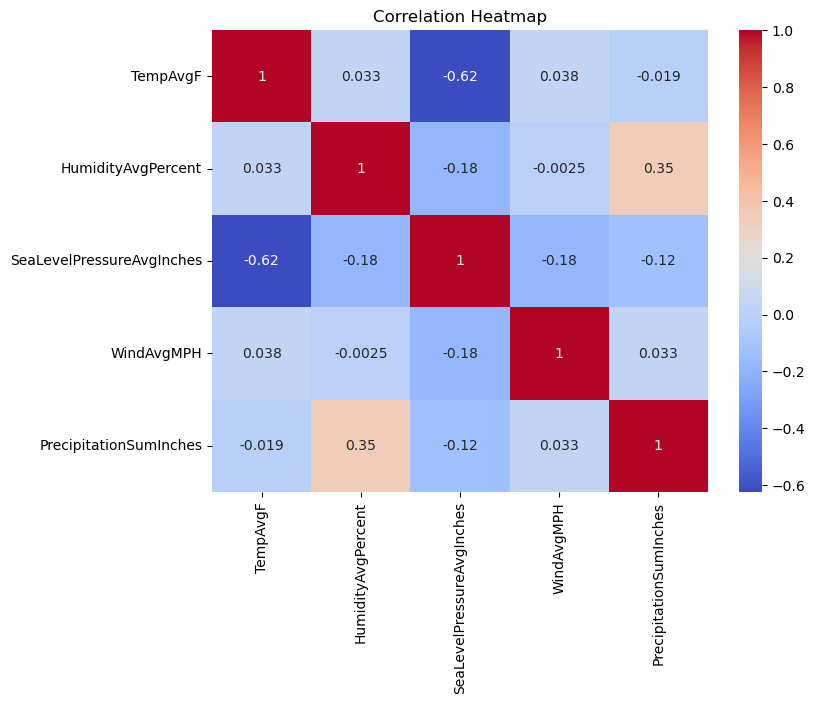

In [ ]:
#################################
# Correlation Analysis
#################################

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

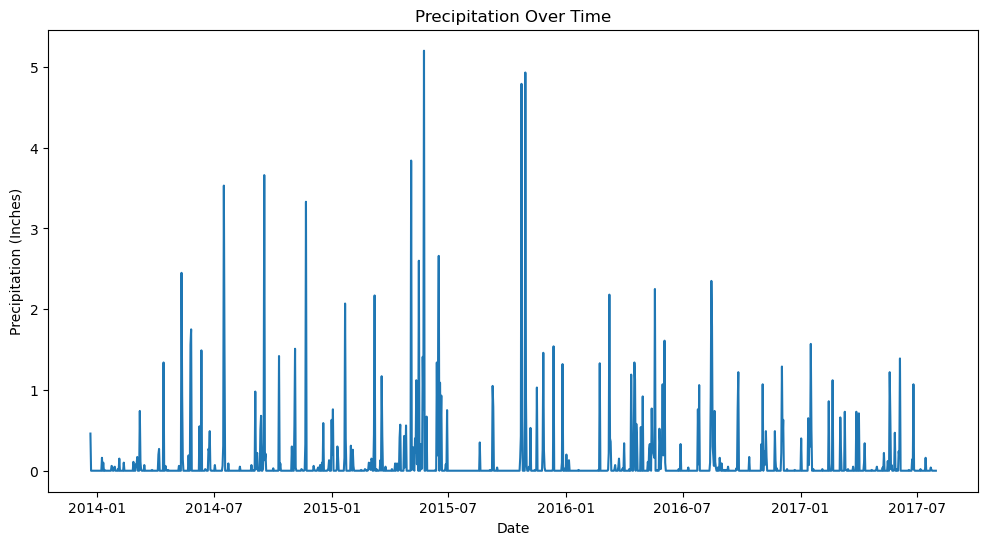

In [29]:
#visualisation

#visualize precipitation over time 
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df_sorted = df.sort_values('Date')
    plt.figure(figsize=(12,6))
    plt.plot(df_sorted['Date'], df_sorted['PrecipitationSumInches'])
    plt.title("Precipitation Over Time")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (Inches)")
    plt.show()

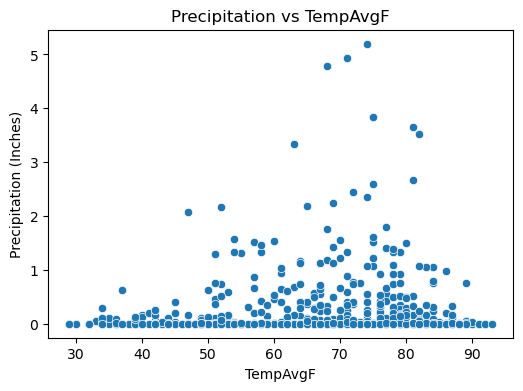

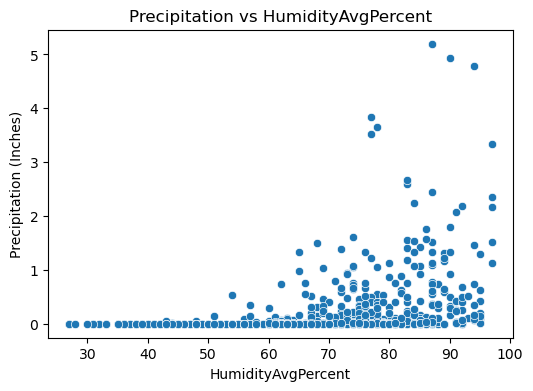

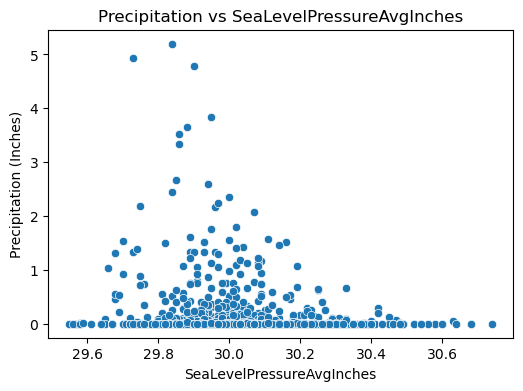

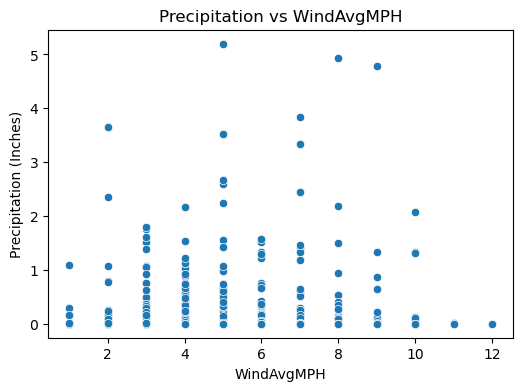

In [30]:
# Scatter plots for relationships
for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data[feature], y=data[target])
    plt.title(f"Precipitation vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Precipitation (Inches)")
    plt.show()


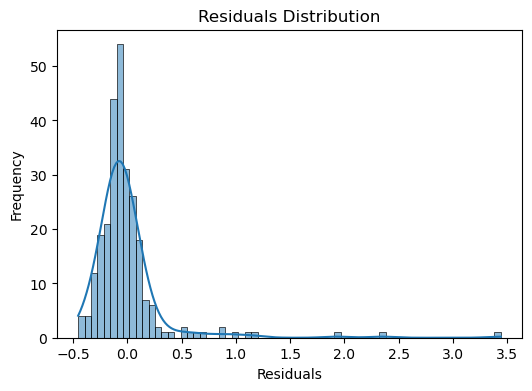

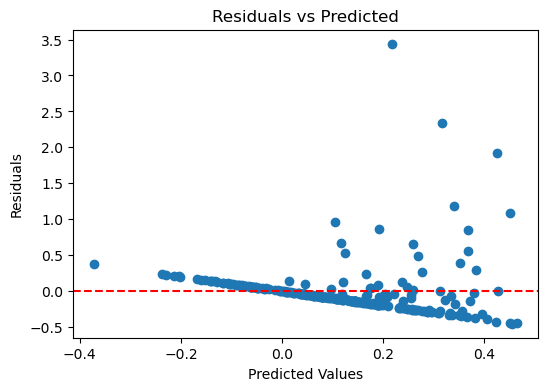

In [32]:
#################################
# Residual Analysis
#################################

residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

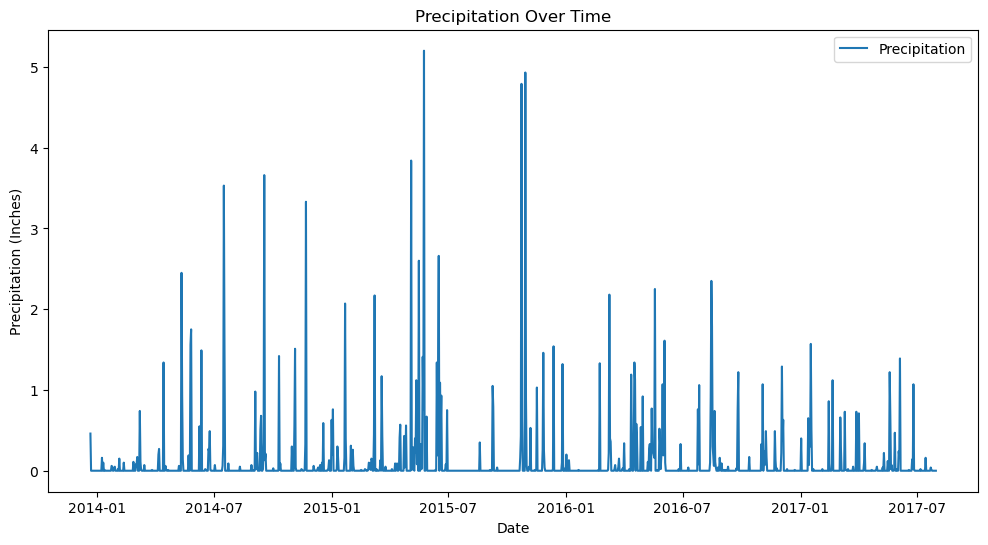

In [33]:

#################################
# Precipitation Over Time
#################################

if 'Date' in df.columns:
    df_sorted = df.sort_values('Date')
    plt.figure(figsize=(12,6))
    plt.plot(df_sorted['Date'], df_sorted['PrecipitationSumInches'], label='Precipitation')
    plt.title("Precipitation Over Time")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (Inches)")
    plt.legend()
    plt.show()
